<a href="https://colab.research.google.com/github/theBuluku/Mchezo_Pesa_Limited_Super_Project./blob/master/Mchezo_Pesa_Limited_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT.


A Prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

#Metrics of success.

On polynomial regression approach the metrics of success are RootMeanSquaredError and r2_score

On Logistic approach metrics of success are f1-score accuracy and confusion matrix

In [0]:
# Importing libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import chi2,bartlett
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

#Exploratory Data Analysis.

In [0]:
rankings=pd.read_csv('fifa_ranking.csv')

In [0]:
results=pd.read_csv('results.csv')

In [0]:
rankings.head(6)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
5,6,Republic of Ireland,IRL,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [0]:
results.head(6)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False


# Data statistics

In [0]:
#Provides basic statistics for the attributes-e,g counts percentiles,
#mean,standard deviation
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [0]:
rankings.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,41361.000000,41360.000000,41360.000000,41360.000000,41360.000000,41360.000000,41360.000000,41360.000000,41360.000000,41360.000000,41360.000000,41360.000000
mean,100.139310,9.747373,303.542045,-0.011509,5.036464,5.036464,4.583521,2.291769,4.709264,1.412786,5.031722,1.006354
std,57.844482,79.412835,285.012369,5.415747,40.763959,40.763959,42.781605,21.390843,42.100737,12.630233,41.551552,8.310359
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,43.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,0.000000,242.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,150.000000,0.000000,506.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,207.000000,1624.450000,1920.000000,92.000000,748.050000,748.050000,1088.300000,544.150000,1045.510000,313.650000,1045.710000,209.140000


In [0]:
#I found out the total number of rows and columns in the data set using “.shape”.
rankings.shape

(41361, 16)

In [0]:
results.shape

(40839, 9)

In [0]:
#It is also a good practice to know the columns and their corresponding data types,along with finding whether they contain null values or not.
rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 16 columns):
rank                       41361 non-null int64
country_full               41361 non-null object
country_abrv               41360 non-null object
total_points               41360 non-null float64
previous_points            41360 non-null float64
rank_change                41360 non-null float64
cur_year_avg               41360 non-null float64
cur_year_avg_weighted      41360 non-null float64
last_year_avg              41360 non-null float64
last_year_avg_weighted     41360 non-null float64
two_year_ago_avg           41360 non-null float64
two_year_ago_weighted      41360 non-null float64
three_year_ago_avg         41360 non-null float64
three_year_ago_weighted    41360 non-null float64
confederation              41360 non-null object
rank_date                  41360 non-null object
dtypes: float64(11), int64(1), object(4)
memory usage: 5.0+ MB


In [0]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [0]:
rankings.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [0]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [0]:
# Checking for null values in the rank dataset

rankings.isnull().sum().any()

True

In [0]:
# Checking for null values in the rank dataset

results.isnull().sum().any()

False

In [0]:
# Checking for duplicates
rankings.duplicated().any()

True

In [0]:
# Checking for duplicates
results.duplicated().any()

False

In [0]:
# Droping duplicates
rankings.drop_duplicates(keep ='first',inplace=True)

# Checking for duplicates whether they have actually been dropped
rankings.duplicated().any()

False

In [0]:
# Getting the number of unique countries in the rank datasets

uniq_country = rankings.country_full.unique()
len(uniq_country)

214

In [0]:
# Getting the number of unique dates in the rank datasets

uniq_dates = rankings.rank_date.unique()
len(uniq_dates)

209

In [0]:
# Getting the number of unique dates in the rank datasets

uniq_dates = results.date.unique()
len(uniq_dates)

15115

In [0]:
# Getting the number of unique dates in the rank datasets

uniq_dates = rankings.rank_date.unique()
len(uniq_dates)

209

#Combination of the Two Datasets.

In [0]:
# Checking unique dates that are common in both datasets

list1 = []

uniq_dates  = list(uniq_dates)
uniq_date_results = list(uniq_date_results)

for x in uniq_dates:
  if x in uniq_date_results:
    list1.append(x)
print(list1)
print(len(list1))

In [0]:
# Renaming the two columns for easier merging with the results datsets

rankings.rename(columns = {"country_full":"country","rank_date":"date"},inplace=True)
rankings.columns

Index(['rank', 'country', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date'],
      dtype='object')

In [0]:
# Merging the datasets using both the dates and country columns

fifa_df=pd.merge(rankings,results,on = ["date","country"])

# Previewing the merged dataset
fifa_df.head()
 

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,8,Brazil,BRA,0.0,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,False
1,35,Ecuador,ECU,0.0,23.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,False
2,50,Zimbabwe,ZIM,0.0,27.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,Harare,False
3,59,Bolivia,BOL,0.0,13.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,False
4,65,Guinea,GUI,0.0,23.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,False


In [0]:
# Getting the statistical information of the merged dataset
fifa_df.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,62.822637,1.722754,469.338390,-0.009335,0.899253,0.899253,0.781179,0.390583,0.888425,0.266534,0.831925,0.166383,1.625438,1.036173
std,46.721773,35.308788,315.394927,4.404745,17.795579,17.795579,17.001154,8.500394,20.087783,6.026466,16.193407,3.238589,1.860423,1.171048
min,1.000000,0.000000,0.000000,-22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,218.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,491.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,93.000000,0.000000,660.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,201.000000,970.350000,1683.000000,30.000000,474.780000,474.780000,477.550000,238.770000,570.520000,171.160000,428.220000,85.640000,31.000000,9.000000


In [0]:
# Getting the names of the columns in the merged dataset

fifa_df.columns

Index(['rank', 'country', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral'],
      dtype='object')

# Checking for Outliers.

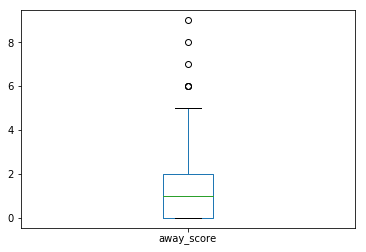

In [0]:
# checking for outlers
fifa_df['away_score'].plot(kind = 'box')

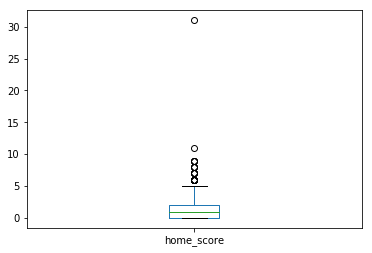

In [0]:
# checking for outlers of homescore

fifa_df['home_score'].plot(kind = 'box')

#VISUALISATION.

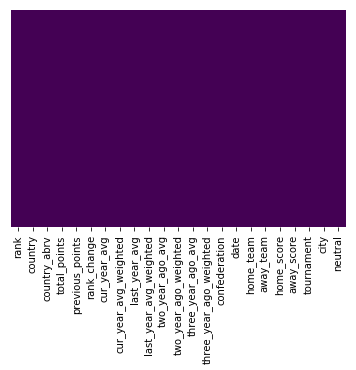

In [0]:
sns.heatmap(fifa_df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

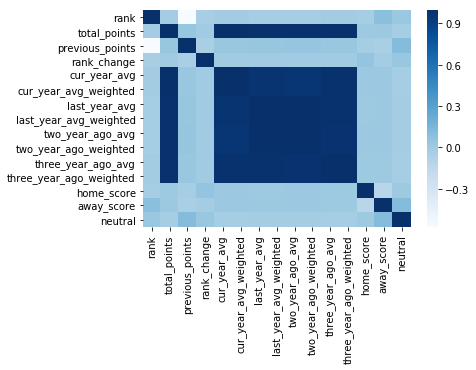

In [0]:
plt.figure(figsize=(6,4))
sns.heatmap(fifa_df.corr(),cmap='Blues',annot=False) 

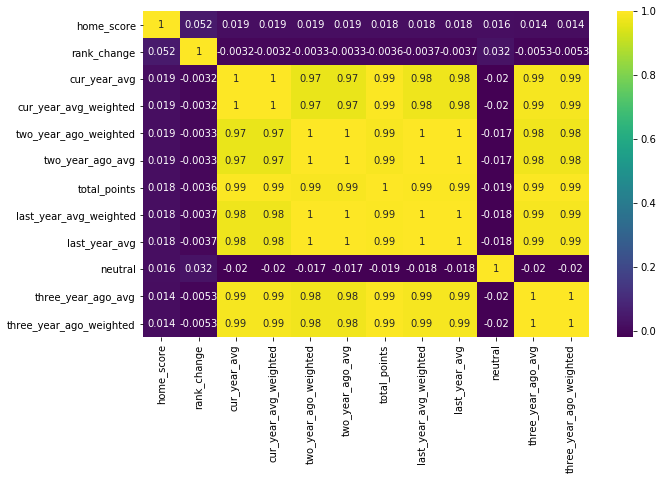

In [0]:
#Quality correlation matrix
k = 12 #number of variables for heatmap
cols = fifa_df.corr().nlargest(k, 'home_score')['home_score'].index
cm = fifa_df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

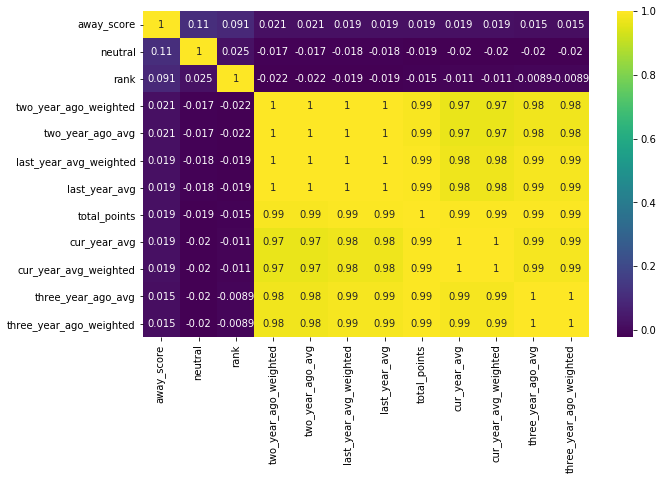

In [0]:
#Quality correlation matrix
k = 12 #number of variables for heatmap
cols = fifa_df.corr().nlargest(k, 'away_score')['away_score'].index
cm = fifa_df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [0]:
# Dropping 'country abbrev' column

fifa_df.drop('country_abrv',inplace=True,axis=1)
fifa_df.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,8,22,0.0,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,24,101,1,1,15,186,0
1,35,38,0.0,23.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,45,172,5,0,14,266,0
2,50,149,0.0,27.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,164,54,2,0,15,119,0
3,59,19,0.0,13.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,21,169,3,1,14,162,0
4,65,56,0.0,23.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,65,143,1,0,15,75,0


In [0]:
# Changing the categorical data fro data type object to category

fifa_df[['tournament', 'city','country','home_team', 'away_team','confederation']] = fifa_df[['tournament', 'city','country','home_team', 'away_team','confederation']].astype('category')
fifa_df.dtypes

rank                          int64
country                    category
country_abrv                 object
total_points                float64
previous_points             float64
rank_change                 float64
cur_year_avg                float64
cur_year_avg_weighted       float64
last_year_avg               float64
last_year_avg_weighted      float64
two_year_ago_avg            float64
two_year_ago_weighted       float64
three_year_ago_avg          float64
three_year_ago_weighted     float64
confederation              category
date                         object
home_team                  category
away_team                  category
home_score                    int64
away_score                    int64
tournament                 category
city                       category
neutral                        bool
dtype: object

In [0]:
# Changing the data type of date from object to datetime

fifa_df['date'] = pd.to_datetime(fifa_df['date'])
fifa_df['date'].dtype

dtype('<M8[ns]')

In [0]:
# Changing categorical variable to integer using label encoder.

cat = ['tournament', 'city','country','home_team', 'away_team','confederation','neutral','date']
for i in cat:
  
  le = LabelEncoder()
  fifa_df[i] = le.fit_transform(fifa_df[i])
fifa_df.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,8,22,BRA,0.0,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,24,101,1,1,15,186,0
1,35,38,ECU,0.0,23.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,45,172,5,0,14,266,0
2,50,149,ZIM,0.0,27.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,164,54,2,0,15,119,0
3,59,19,BOL,0.0,13.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,21,169,3,1,14,162,0
4,65,56,GUI,0.0,23.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,65,143,1,0,15,75,0


# APPLICATION OF MACHINE LEARNING

# First Approach.

#1. Logistic Regression.

In [0]:
# Splitting the dataset into feature and target sets of away  team

X_away =fifa_df[['rank','home_team', 'away_team', 'home_score','tournament']]
y_away = fifa_df['away_score']

In [0]:
# Checking for multicollinearity
corra =X_away.corr()
multa = pd.DataFrame(np.linalg.inv(corra.values) ,index = corra.index ,columns = corra.columns)
multa

,rank,home_team,away_team,home_score,tournament
rank,1.016004,-0.005551,0.029808,0.028909,0.124040
home_team,-0.005551,1.003695,-0.028440,0.036466,0.036918
away_team,0.029808,-0.028440,1.011323,0.082395,0.061473
home_score,0.028909,0.036466,0.082395,1.012033,0.065665
tournament,0.124040,0.036918,0.061473,0.065665,1.023107


No multicolinearity

In [0]:
#splitting the train set and test set

x_away_train,x_away_test,y_away_train,y_away_test = train_test_split(X_away,y_away,test_size = 0.2,random_state =0)

In [0]:
# Predicting the model using linear regression
lr = LinearRegression()
lr.fit(x_away_train,y_away_train)

y_away_pred = lr.predict(x_away_test)
# Metrics of success
print("RMSE : ",np.sqrt(mean_squared_error(y_away_test,y_away_pred)))
comp = pd.DataFrame({"Actual":y_away_test,"Predicted":y_away_pred})
print(comp.describe())

RMSE :  1.1167005046146148
          Actual   Predicted
count  172.00000  172.000000
mean     1.02907    1.022051
std      1.11569    0.245787
min      0.00000   -0.613527
25%      0.00000    0.891115
50%      1.00000    1.019823
75%      2.00000    1.164222
max      5.00000    1.546808


The RMSE score of about 1.15 is which is than 10% of mean it's not very good prediction.



#2. Polynomial Regression.

In [0]:
# using polynomial regrresion to fit and predict the model
polynomial_fn =PolynomialFeatures(degree=2)
x_train_poly =polynomial_fn.fit_transform(x_away_train)
x_test_poly = polynomial_fn.fit_transform(x_away_test)

lr = LinearRegression()
lr.fit(x_train_poly,y_away_train)

y_away_poly_pred = lr.predict(x_test_poly)
#metrics of success
print(np.sqrt(mean_squared_error(y_away_test,y_away_poly_pred)))
comp = pd.DataFrame({"Actual":y_away_test,"Predicted":y_away_poly_pred}).head(20)
print(comp.describe())


1.1541292951783773
          Actual  Predicted
count  20.000000  20.000000
mean    1.100000   1.006300
std     1.209611   0.328272
min     0.000000   0.234774
25%     0.000000   0.859485
50%     1.000000   0.947182
75%     1.250000   1.125170
max     4.000000   1.759886


The RMSE score of 1.15 is higher than 10% of mean which is 0.1,hence its not very good but can still be used for prediction because its deviation is not big.

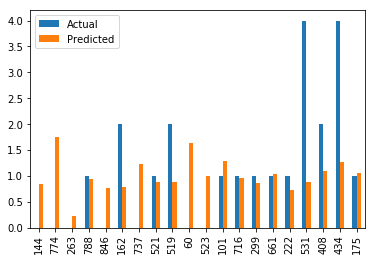

In [0]:
comp.plot(kind='bar')

#Barlet's Test.

In [0]:
# Checking for residuals
residuals = np.subtract(y_away_poly_pred, y_away_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.017263189383634466

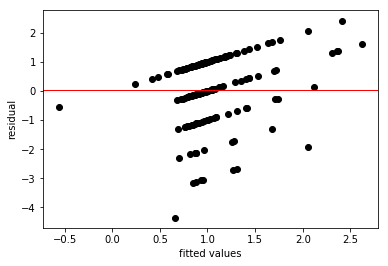

In [0]:
# Plotting the residuals against the fitted using a scatter plot

plt.scatter(y_away_poly_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

#Second Approach.

#Third Approach.

In [0]:
#Checking our dataset.
fifa_df.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,8,22,0.0,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,24,101,1,1,15,186,0
1,35,38,0.0,23.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,45,172,5,0,14,266,0
2,50,149,0.0,27.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,164,54,2,0,15,119,0
3,59,19,0.0,13.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,21,169,3,1,14,162,0
4,65,56,0.0,23.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,65,143,1,0,15,75,0


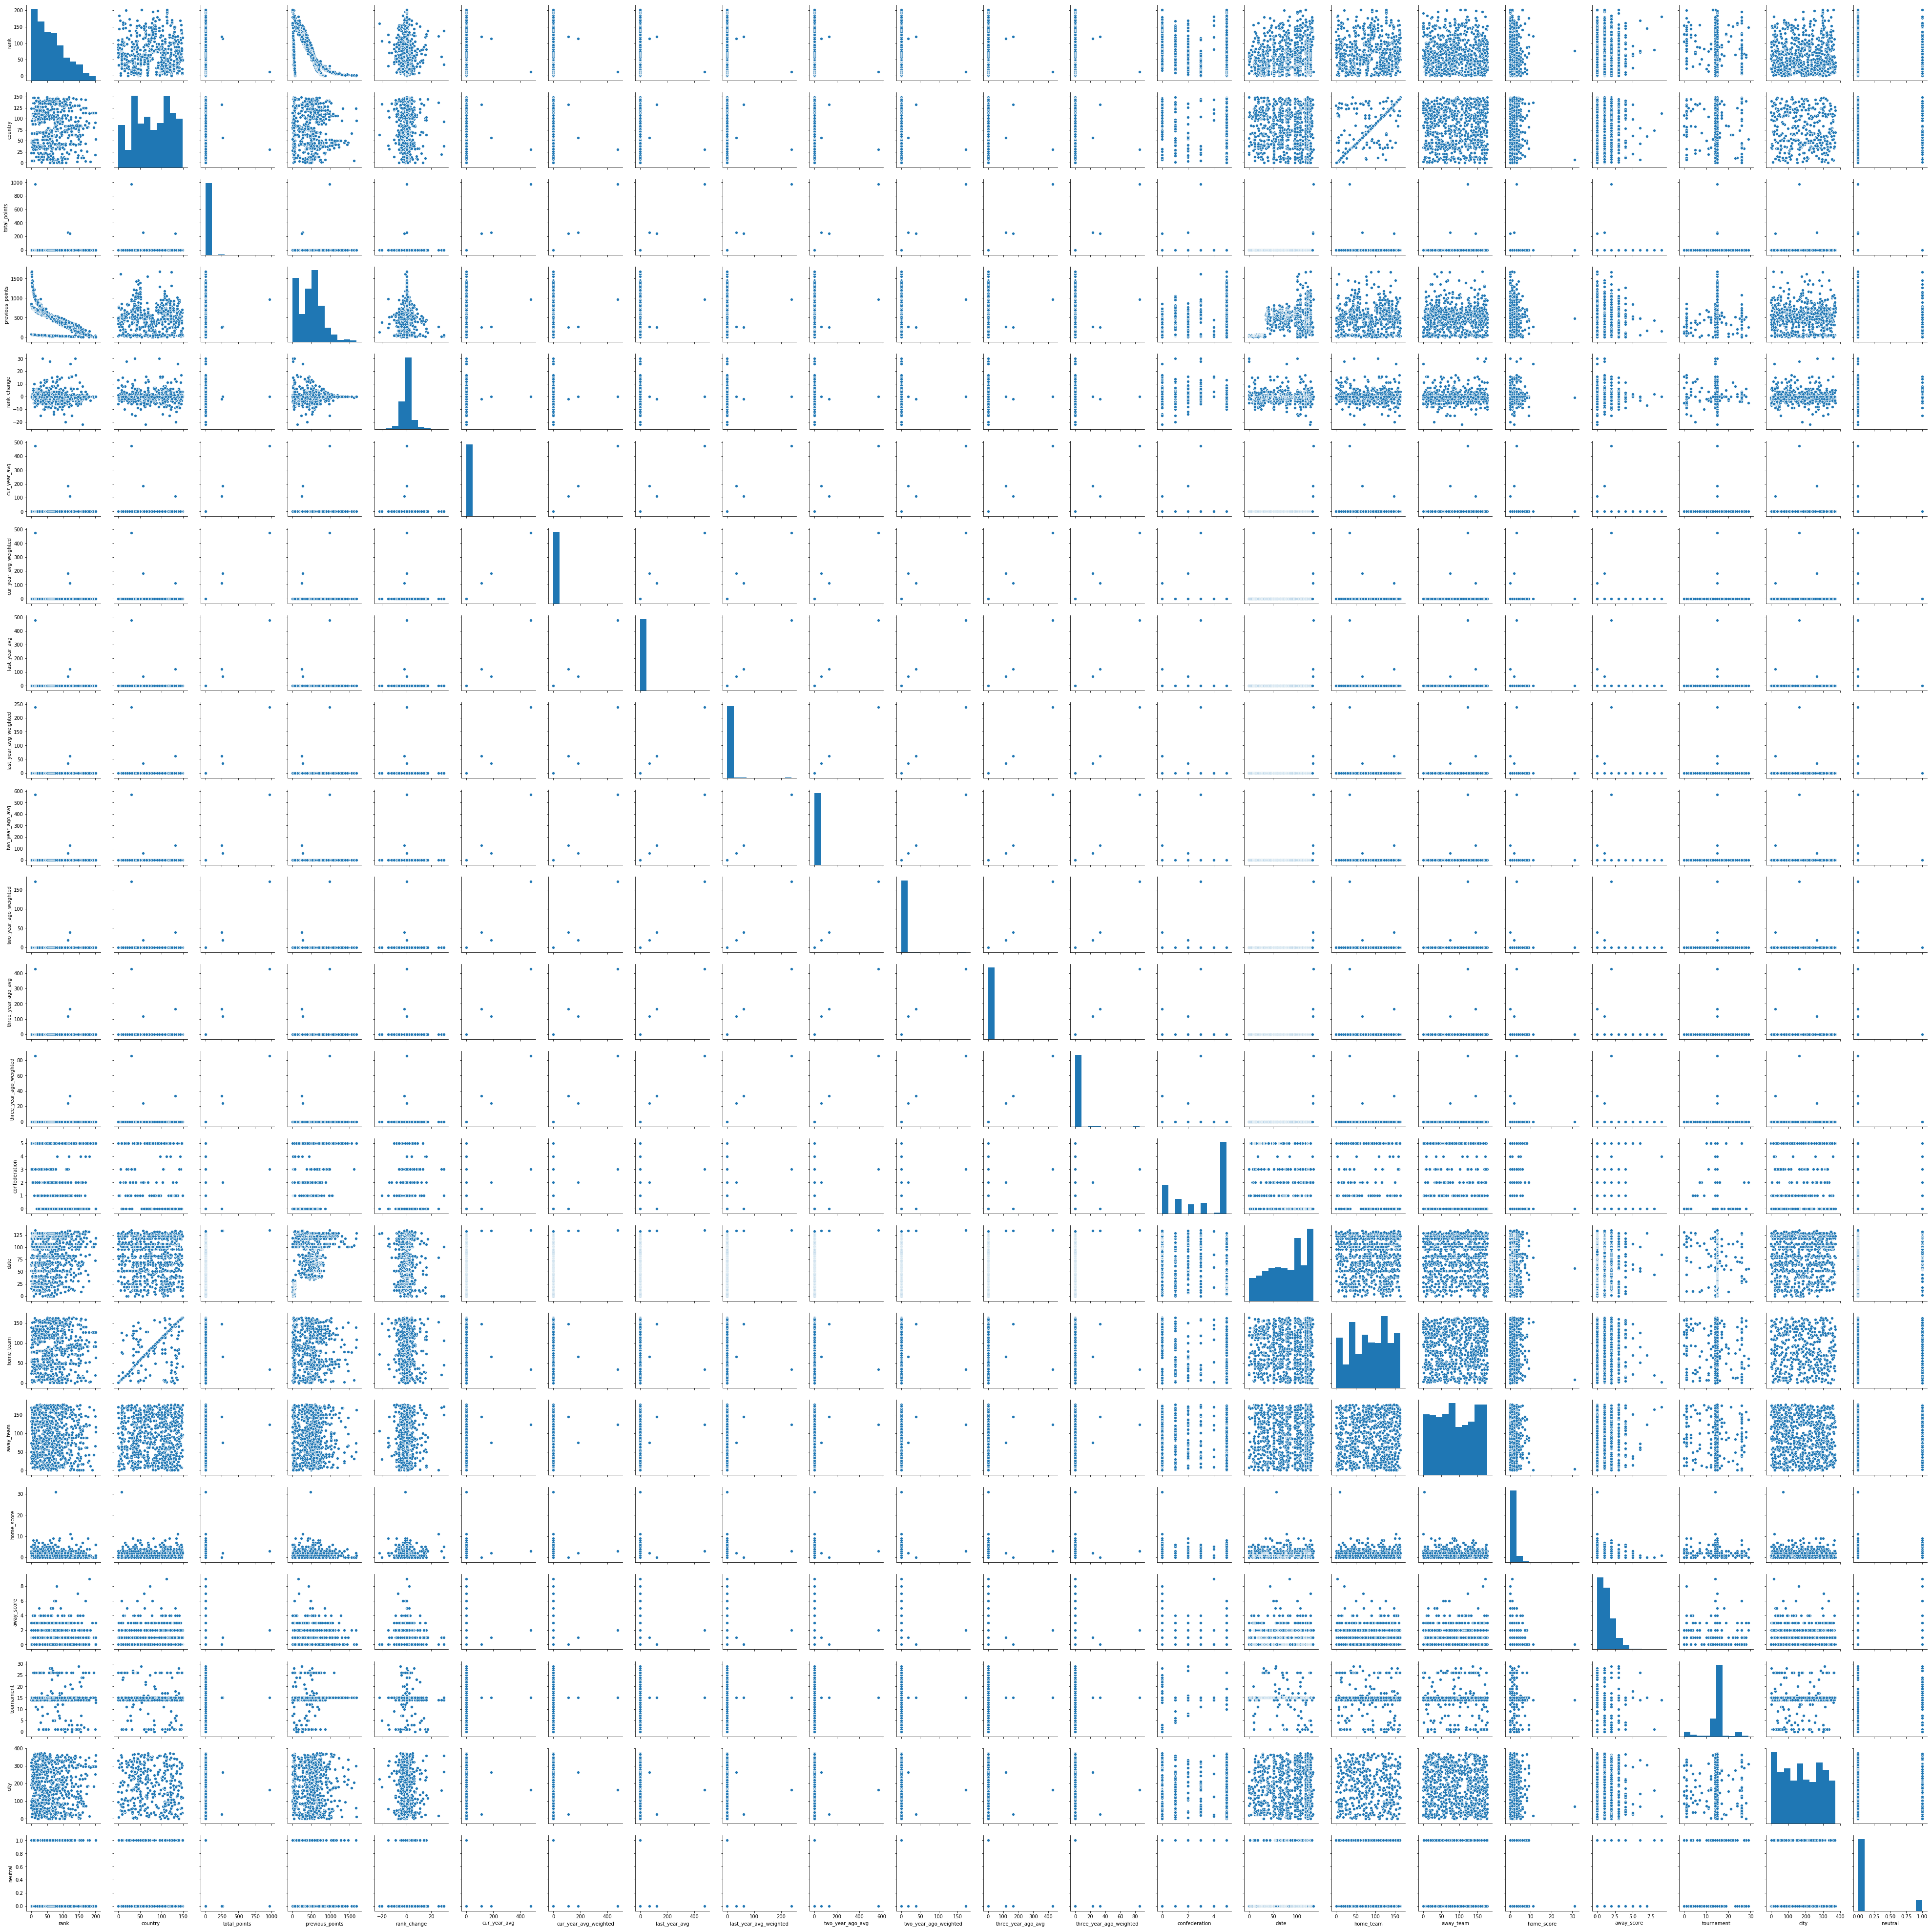

In [0]:
sns.pairplot(fifa_df)

In [0]:
fifz